In [2]:
import pandas as pd

import nltk
import string
import re
import numpy as np
import pandas as pd
import pickle
#import lda

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from nltk.stem.porter import *
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction import stop_words

from collections import Counter
#from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline

import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_notebook
#from bokeh.transform import factor_cmap

import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger("lda").setLevel(logging.WARNING)
import gensim
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
%matplotlib inline

In [3]:
df=pd.read_csv('processed.csv', encoding='Latin-1')
del df['Unnamed: 0']

In [175]:
len(df)

52023

In [4]:
df4=pd.read_csv('questionbigram1_v2.csv')
df4=df4.fillna('buriub')

list1=[]
for i in range(0,len(df4)):
    for j in range(0,len(df4.iloc[i])):
        a=df4.iloc[i][j]
        list1.append(a)
        
        
list1=list(set(list1))
list1.append('?')

In [5]:
df_techwords=pd.read_csv('tech_words.csv', encoding='Latin-1')

techwords=df_techwords['techwords'].tolist()

In [178]:
#df=df[['message']]

In [6]:
stop_words = set(stopwords.words('english'))

In [7]:
def tokenize(text):
    """
    sent_tokenize(): segment text into sentences
    word_tokenize(): break sentences into words
    """
    try: 
        regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]')
        text1 = regex.sub(" ", text) # remove punctuation
        
        tokens_ = [word_tokenize(s) for s in sent_tokenize(text1)]
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent
        #tokens = list(filter(lambda t: t.lower() in list1, tokens))
        filtered_tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
        
        filtered_tokens=[w for w in filtered_tokens if not w in stop_words]
        filtered_tokens = [w.lower() for w in filtered_tokens if len(w)>=1]
        #if '?' in text:
           # filtered_tokens.append('?')
        return (filtered_tokens)
            
    except TypeError as e: print(text,e)

In [8]:
df['tokens']=df['message'].map(tokenize)

In [9]:
all_sents=df['tokens'].tolist()

In [10]:
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
 

# train word2vec on the two sentences
model = gensim.models.Word2Vec(all_sents, min_count=50,window=5)

2018-06-11 22:27:02,624 : INFO : collecting all words and their counts
2018-06-11 22:27:02,632 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-06-11 22:27:02,660 : INFO : PROGRESS: at sentence #10000, processed 58042 words, keeping 7575 word types
2018-06-11 22:27:02,709 : INFO : PROGRESS: at sentence #20000, processed 117083 words, keeping 11095 word types
2018-06-11 22:27:02,752 : INFO : PROGRESS: at sentence #30000, processed 176350 words, keeping 13675 word types
2018-06-11 22:27:02,798 : INFO : PROGRESS: at sentence #40000, processed 233029 words, keeping 15925 word types
2018-06-11 22:27:02,836 : INFO : PROGRESS: at sentence #50000, processed 291194 words, keeping 18317 word types
2018-06-11 22:27:02,844 : INFO : collected 18820 word types from a corpus of 303723 raw words and 52023 sentences
2018-06-11 22:27:02,845 : INFO : Loading a fresh vocabulary
2018-06-11 22:27:02,880 : INFO : min_count=50 retains 1034 unique words (5% of original 18820, dro

#### Include a TSNE plot of word embeddings with word2vec in the presentation

In [12]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

2018-06-11 22:27:21,429 : INFO : collecting all words and their counts
2018-06-11 22:27:21,431 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-06-11 22:27:21,453 : INFO : PROGRESS: at sentence #10000, processed 58042 words, keeping 7575 word types
2018-06-11 22:27:21,480 : INFO : PROGRESS: at sentence #20000, processed 117083 words, keeping 11095 word types
2018-06-11 22:27:21,498 : INFO : PROGRESS: at sentence #30000, processed 176350 words, keeping 13675 word types
2018-06-11 22:27:21,521 : INFO : PROGRESS: at sentence #40000, processed 233029 words, keeping 15925 word types
2018-06-11 22:27:21,543 : INFO : PROGRESS: at sentence #50000, processed 291194 words, keeping 18317 word types
2018-06-11 22:27:21,555 : INFO : collected 18820 word types from a corpus of 303723 raw words and 52023 sentences
2018-06-11 22:27:21,560 : INFO : Loading a fresh vocabulary
2018-06-11 22:27:21,583 : INFO : min_count=200 retains 266 unique words (1% of original 18820, dro

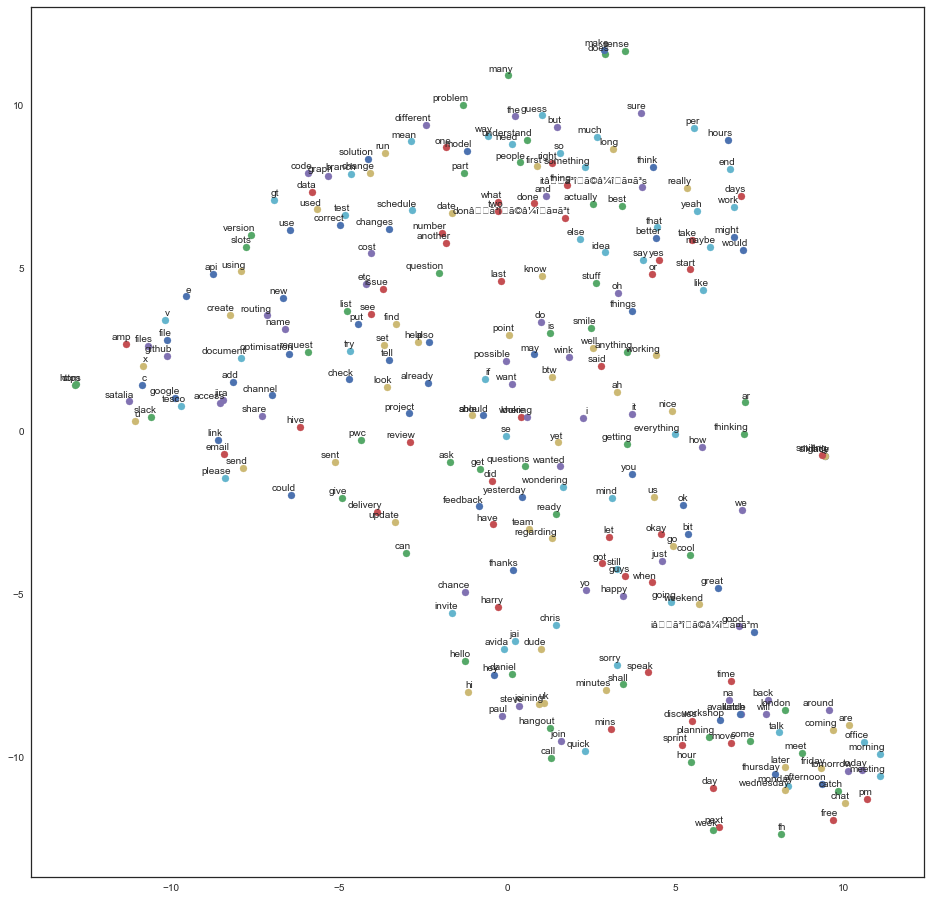

In [13]:
model = gensim.models.Word2Vec(all_sents, size=100, window=20, min_count=200, workers=4)
tsne_plot(model)

##### You can see  words used in similar contexts are positioned closed together

In [14]:
all_words=[]
for i in range(0,len(df)):
    l=df.iloc[i][1]
    for j in l:
        all_words.append(j)

In [15]:
all_words=list(set(all_words))

In [16]:
all_words = [w for w in all_words \
                 if ( nltk.pos_tag([w])[0][1]=='VB' or nltk.pos_tag([w])[0][1]=='JJ' or nltk.pos_tag([w])[0][1]=='VBG' \
           or nltk.pos_tag([w])[0][1]=='VBN' or nltk.pos_tag([w])[0][1]=='NNS' or nltk.pos_tag([w])[0][1]=='NN')]

In [189]:
len(all_words)

22

In [17]:
#model.most_similar('schedule')

def techword_flag(x):
    list1=[]
    
    try:
        w=model.most_similar(x)

        for i in w:
            list1.append(i[0])

        c=0

        for j in list1:
            #print(j)
            if j in techwords:
                c=c+1

        return c/len(list1)
    except:
        return(0)

In [18]:
def sent_techscore(x):
    list1=[]
    for i in x:
        try:
            #list1.append(df_word_tech[df_word_tech['word']==i].reset_index(drop=True).iloc[0][1])
            list1.append(techword_flag(i))
        except:
            list1.append(0)
    return sum(list1)

In [22]:
def tech_word_in(x):
    list1=[]
    for i in x:
        if i in techwords:
            list1.append(1)
            
    return len(list1)

In [19]:
df['tech_score']=df['tokens'].map(sent_techscore)

2018-06-11 22:27:45,575 : INFO : precomputing L2-norms of word weight vectors


In [23]:
df['tech_wordIn']=df['tokens'].map(tech_word_in)

In [20]:
df

,timestamp,user_id,message,dest,MsgId,ques,message2,word_count,users,users2,...,replybysender,ques_asking_keywords,clean_msg_Dest,clean_msg_starter,keywords_starterReply,keywords_DESTReply,concat_keywords,tokens,tech_score,tech_wordIn
0,1.481989e+09,U14K5KWC8,"Hey Dan, I'm in front of the office building t...",U02EBRG16,0,1,"['Hey', 'Dan', 'I', ""'m"", 'front', 'office', '...",17,U14K5KWC8_U02EBRG16,U02EBRG16_U14K5KWC8,...,"['[\'All\', \'good\', \'I\', ""\'m"", \'slightly...",i do i have,"['yep', 'slightly_smiling_face', 'enter', 'sid...","['All', 'good', 'I', 'm', 'slightly_smiling_fa...",yeah,yep_great,"['i do i have', 'yep_great', 'yeah']","[hey, dan, i, front, office, building, trying,...",0.3,0
1,1.481990e+09,U02EBRG16,does the peer feedback save?,U06U2FKJ4,10,1,"['does', 'peer', 'feedback', 'save']",4,U02EBRG16_U06U2FKJ4,U06U2FKJ4_U02EBRG16,...,"['[\'it\', ""\'s"", \'me\', \'ages\']', '[\'I\',...",does,"['Yes', 'Me']","['it', 's', 'me', 'ages', 'I', 'm', 'afriad', ...",NaN,yes,"['does', 'yes', 'NA']","[peer, feedback, save]",0.0,1
2,1.481991e+09,U0C7MPQNP,can you set that to one month for testing purp...,U2KLZ4MCK,16,1,"['can', 'you', 'set', 'that', 'to', 'one', 'mo...",9,U0C7MPQNP_U2KLZ4MCK,U2KLZ4MCK_U0C7MPQNP,...,"[""['U0C7MPQNP', 'uploaded', 'file', 'https', '...",can you,"['I', 'figured', 'it', 'thx']","['U0C7MPQNP', 'uploaded', 'file', 'https', '//...",NaN,thx,"['can you', 'thx', 'NA']","[set, one, month, testing, purposes]",0.4,1
3,1.482068e+09,U1K1P0ENR,"Hey Harry, how do I sign in to audible?",U02EEHT1J,27,1,"['Hey', 'Harry', 'how', 'do', 'I', 'sign', 'to...",8,U1K1P0ENR_U02EEHT1J,U02EEHT1J_U1K1P0ENR,...,"['[\'I\', \'do\', ""n\'t"", \'have\', \'access\'...",how do i,"['The', 'logins', 'are', 'Vault', 'simple_smil...","['I', 'do', 'nt', 'have', 'access', 'to', 'Vau...",NaN,NaN,"['how do i', 'NA', 'NA']","[hey, harry, i, sign, audible]",0.0,0
4,1.482074e+09,U1K1P0ENR,"Yo, how do I get access to Vault?",U02EENFGK,37,1,"['Yo', 'how', 'do', 'I', 'access', 'to', 'Vault']",7,U1K1P0ENR_U02EENFGK,U02EENFGK_U1K1P0ENR,...,[],how do i,"['email', 'password', 'changeme123', 'much', '...",[''],NaN,NaN,"['how do i', 'NA', 'NA']","[yo, i, get, access, vault]",0.4,2
5,1.482095e+09,U02EBRG16,hi philipp - so that i don't have to dig it ou...,U056HCTHB,74,1,"['philipp', 'that', 'i', 'do', ""n't"", 'have', ...",18,U02EBRG16_U056HCTHB,U056HCTHB_U02EBRG16,...,"[""['it', 'Philipp']"", ""['If', 'you', 'can', 'p...",i have it can you how,"['U056HCTHB', 'uploaded', 'file', 'https', '//...","['it', 'Philipp', 'If', 'you', 'can', 'provide...",NaN,NaN,"['i have it can you how', 'NA', 'NA']","[hi, philipp, dig, let, know, much, owe, alex]",0.0,0
6,1.482096e+09,U02EBRG16,"Hi Jane - when you get a moment, can you let m...",U02ELHV92,76,1,"['Hi', 'Jane', 'when', 'you', 'moment', 'can',...",14,U02EBRG16_U02ELHV92,U02ELHV92_U02EBRG16,...,"[""['awesome', 'Jane']""]",when you can you what,"['U02ELHV92', 'uploaded', 'file', 'https', '//...","['awesome', 'Jane']",awesome,NaN,"['when you can you what', 'NA', 'awesome']","[hi, jane, get, moment, let, know, owe, alex, ...",0.1,0
7,1.482098e+09,U2KLZ4MCK,or the time until when to download all the mes...,U0C7MPQNP,77,1,"['time', 'when', 'to', 'download', 'messages']",5,U2KLZ4MCK_U0C7MPQNP,U0C7MPQNP_U2KLZ4MCK,...,"[""['do', 'you']"", ""['how', 'many', 'messages',...",when,"['We', 'nt', 'from', 'api', 'sweat_smile', 'Ye...","['do', 'you', 'how', 'many', 'messages', 'to',...",NaN,yeah,"['when', 'yeah', 'NA']","[time, download, messages]",0.0,0
8,1.482098e+09,U2KLZ4MCK,do you specify anywhere,U0C7MPQNP,78,1,"['do', 'you']",2,U2KLZ4MCK_U0C7MPQNP,U0C7MPQNP_U2KLZ4MCK,...,"[""['how', 'many', 'messages', 'to', 'download'...",do you,"['We', 'nt', 'from', 'api', 'sweat_smile', 'Ye...","['how', 'many', 'messages', 'to', 'download', ...",NaN,yeah,"['do you', 'yeah', 'NA']","[specify, anywhere]",0.0,0
9,1.482098e+09,U2KLZ4MCK,how many messages to download,U0C7MPQNP,79,1,"['how', 'many', 'messages', 'to', 'download']",5,U2

In [24]:
#df['work_ques']=0
df.loc[(df['tech_wordIn'] ==1 )| (df['tech_score'] > 0.2), 'work_ques'] = 1
df['work_ques'].fillna(0,inplace=True)

In [25]:
df.to_csv('tech_Score_added.csv')

In [26]:
df['work_ques'].sum()

21739.0

In [27]:
df=df[df['work_ques']==1]

In [28]:
'''word=[]
tech_score=[]
for i in techwords:
    word.append(i)
    #tech_score
    tech_score.append(techword_flag(i))'''

'word=[]\ntech_score=[]\nfor i in techwords:\n    word.append(i)\n    #tech_score\n    tech_score.append(techword_flag(i))'

In [29]:
'''df_word_tech=pd.DataFrame()
df_word_tech['word']=word
df_word_tech['tech_score']=tech_score'''

"df_word_tech=pd.DataFrame()\ndf_word_tech['word']=word\ndf_word_tech['tech_score']=tech_score"

In [30]:
df_id_name=pd.read_csv('users.csv')
#df1[['user_id','username']]

In [31]:
user_list=[]
for i in range(0,len(df_id_name)):
    a=df_id_name.iloc[i][0]
    user_list.append(a)

In [32]:
user_list = [x for x in user_list if str(x) != 'nan']




user_list.remove('U3U5ZCZDX')
user_list.remove('U3XV4871Q')
user_list.remove('U50L4SLQZ')
user_list.remove('U1WPWN8H1')
user_list.remove('U5E2CLXDJ')
user_list.remove('U7L5X0R61')
user_list.remove('U7LPQDYJZ')
user_list.remove('U4GDAS667')
user_list.remove('U2K3V0VK7')



In [33]:
def find_username(id):
    for i in range(0,len(df_id_name)):
        a=df_id_name.iloc[i][0]
        if a == id:
            b=df_id_name.iloc[i][1]
            return b

In [34]:
adj_table=df[['user_id','dest']]
adj_table=adj_table.drop_duplicates()
adj_table=adj_table.reset_index(drop=True)

In [35]:
for i in user_list:


    if i not in (adj_table['user_id'].tolist() or adj_table['dest'].tolist()):
        print(i)

In [36]:
list_edges=[]
for i in range(0,len(adj_table)):
    a=adj_table.iloc[i][0],adj_table.iloc[i][1]
    list_edges.append(a)

In [37]:
list_edges

[('U02EBRG16', 'U06U2FKJ4'),
 ('U0C7MPQNP', 'U2KLZ4MCK'),
 ('U1K1P0ENR', 'U02EENFGK'),
 ('U2KLZ4MCK', 'U0C7MPQNP'),
 ('U14K5KWC8', 'U0BS2CN6L'),
 ('U0LNDAUQ6', 'U1G84H2MN'),
 ('U0TDT85B6', 'U0ZEL9V0F'),
 ('U04PVV50R', 'U26A6T6HF'),
 ('U0TDT85B6', 'U0LNDAUQ6'),
 ('U1Q840YMT', 'U0TDT85B6'),
 ('U0TDT85B6', 'U1Q840YMT'),
 ('U02EEHT1J', 'U2J6KKL1H'),
 ('U02EENFGK', 'U1K1P0ENR'),
 ('U02EENFGK', 'U02EEJB7E'),
 ('U02EENFGK', 'U0LNDAUQ6'),
 ('U02EENFGK', 'U2J6KKL1H'),
 ('U02EEHT1J', 'U2UH7RA22'),
 ('U02EEHT1J', 'U3398JJ6Q'),
 ('U02EEHT1J', 'U02EBRG16'),
 ('U0TDT85B6', 'U02EEHT1J'),
 ('U02EBRG16', 'U0C9GGXLH'),
 ('U0RLB9PFY', 'U2B2C7UKA'),
 ('U10B1MDTL', 'U0CT2TPH8'),
 ('U2B2C7UKA', 'U0RLB9PFY'),
 ('U0LNDAUQ6', 'U14K5KWC8'),
 ('U0LNDAUQ6', 'U02EENFGK'),
 ('U0JET5KPG', 'U0LMZS9LL'),
 ('U14K5KWC8', 'U0LNDAUQ6'),
 ('U0LMZS9LL', 'U0JET5KPG'),
 ('U1K1P0ENR', 'U0DQ5GBHP'),
 ('U0DQ5GBHP', 'U0C9GGXLH'),
 ('U14K5KWC8', 'U0DQ5GBHP'),
 ('U0C7MPQNP', 'U0TDT85B6'),
 ('U0LNDAUQ6', 'U1K1P0ENR'),
 ('U3DNVV2PP',

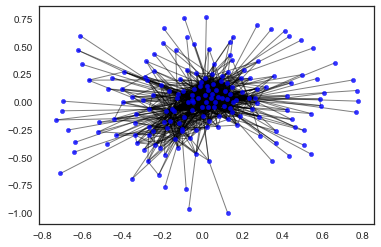

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(user_list)
G.add_edges_from(list_edges,weight=1)

#G.edge[1][2]['weight'] = 4
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_color='b',node_size=20,alpha=0.8)
#nx.draw(G,pos=nx.spring_layout(G),nodelist=[0,1,2,3]) 
#
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5,arrows=True)
#edge_labels=dict([((u,v,),d['weight'])                 for u,v,d in G.edges(data=True)])
#nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

#nx.draw_networkx_labels(G,pos=nx.spring_layout(G),{0,1,2,3,4,5},font_size=16)
#nx.draw(G,arrows=True)
'''
labels={}
labels[0]=r'$0$'
labels[1]=r'$1$'
labels[2]=r'$2$'
labels[3]=r'$3$'
labels[4]=r'$4$'


nx.draw_networkx_labels(G,pos,labels,font_size=16)
'''
plt.savefig("Graph.png", format="PNG")
plt.show()

In [87]:
from matplotlib import pylab
import networkx as nx

def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut =1.5
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    
    xmin = cut * min(xx for xx, yy in pos.values())
    ymin = cut * min(yy for xx, yy in pos.values())
    
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    #plt.show()
    #plt.savefig('X:/' + file_name + '.png', bbox_inches='tight')
    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

#Assuming that the graph g has nodes and edges entered
save_graph(G,"work_questionsNW.pdf")

In [ ]:
degree_dict=dict(G.degree())   #uncomment this line if you installed networkx today and comment the below line
#degree_dict=G.degree()
degree_dict=sorted(degree_dict.items(), key=lambda kv: kv[1], reverse=True)
df_degreefreq = pd.DataFrame([degree_dict])
df_degreefreq =df_degreefreq .T


In [ ]:
degree_dict_list=list(degree_dict)
df_degreefreq[['userID', 'Degree']] = df_degreefreq[0].apply(pd.Series)
del df_degreefreq[0]

In [ ]:
clustering_dict=nx.clustering(G)
clustering_dict=sorted(clustering_dict.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
betweenness_dict=nx.betweenness_centrality(G)
betweenness_dict=sorted(betweenness_dict.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
df_degreefreq['username']=df_degreefreq['userID'].apply(lambda x: find_username(x))


In [ ]:
df_degreefreq

#### No of work related questions per person in the period

In [ ]:
df['dest'].value_counts().head(20).plot.bar(figsize=(12,10))

#### No of persons who asked questions from each person

In [ ]:
adj_table['dest'].value_counts().head(20).plot.bar(figsize=(12,10))

In [ ]:
adj_table['dest'].value_counts().head(20)

you can note that degress is different from no of people who asked questions because degree include both ways. But degree is a good proxy of this

In [ ]:
df_degreefreq.head(20)